# O-нотация

1) Мотивация

2) Асимптотика

3) Скорость процессора

## 1 Мотивация
**Зачем это нужно?** ![fsdf](https://emojipedia-us.s3.dualstack.us-west-1.amazonaws.com/thumbs/72/apple/232/thinking-face_1f914.png)
Казалось бы, что для оценки времени работы можно просто физически измерять время, которое программа работает на разных входных данных. Здесь есть достаточное количество минусов:

на разных компьютерах время работы будет разным;

чтобы измерить время, придется запустить сам алгоритм, но иногда приходится оценивать алгоритмы, требующие часы или даже дни работы;

время будет учитывать какие-то вспомогательные операции, которые на самом деле в текущей оценке не нужны

Зачастую основной задачей программиста становится оптимизировать алгоритм, выполнение которого займёт тысячи лет, до какого-нибудь адекватного времени работы. Поэтому хотелось бы уметь предсказывать, сколько времени займёт выполнение алгоритма ещё до того, как мы его запустим.



Даже неловко объяснять, но всё-таки - **количество строк кода не имеет никакого отношения к скорости работы программы**

In [ ]:
while True:
    pass
#Код, состоящий из двух строк кода, но работающий бесконечно

Делаем вывод: 
**Скорость работы программы зависит от количества сделанных ей операций.** 

А как нам посчитать количество операций? Для это есть такое понятие, как **Асимпотитика** или же **O-нотация**.

## 2 Асимптотика

Пусть  $f(N)$  - это какая-то функция. Говорят, что алгоритм работает за  $O(f(N))$ , если существует число  $C$ , такое что алгоритм работает не более чем за $C*f(N)$  операций.


Например, в таких обозначениях можно сказать, что

Сортировка пузырьком работает за  $O(N^2)$

Сортировка выбором работает за  $O(N^2)$

Сортировка вставками работает за  $O(N^2)$ 

Сортировка подсчетом работает за  $O(N+M)$

Именно поэтому их называют квадратичными. А сортировка подсчётом работает **за линию** - то есть за $O(N)$. Не важно, что за две линии: $O(2N)$ - тоже ялвяется линейным временем работы. Это обозначение этим и удобно, что оно не зависит от умножения на константу или прибавления константы. Если алгоритм работает за $O(N^2)$, то это может значить, что он работает за $N^2$, за $N^2+3$, за $N(N-1)*2$ или даже за $1000*N^2+1$ действие. Главное, что функция ведет себя как $N^2$, то есть при увеличении $N$ (в данном случае это длина массива) он увеличивается как некоторая квадратичная функция. Например, если увеличить $N$ в 10 раз, время работы программы увеличится приблизительно в 100 раз.

Быстрая сортировка, например, работает за $O(N\log N)$

Если же скорость алгоритма не зависит от вводимых данных, (т.е. не зависит от $N$), то говорят, что алгоритм работает за $O(1)$. - это наименьшая возможная асимптотика. 

(btw, очевидно $O(1)$ не значит, что алгоритм работает за одну операцию, он может и работать и за линию и даже за куб. Важно, что время выполнения работы постоянно, и не меняется в зависимости от размера входных данных)

(Если что, то в программировании под $\log N$ принято считать двоичный логарифм т.е. $\log_2 N$)

А теперь самое интересное!
Давайте посмотрим как это выглядит на практике, и не останется людей, которые не понимают **зачем же нам это надо**:

In [11]:
import matplotlib.pyplot as plt
from time import time
from random import randint
import math

Функция, которая строит график работы алгоритма f

In [18]:
def run_and_plot(f, generate_test, start, end, step):
    timings = []
    for i in range(start, end, step):
        args = generate_test(i)
        startt = time()
        f(args)
        endt = time()
        timings.append(endt - startt)
    plt.plot([i for i in range(start, end, step)], timings)

In [19]:
def foo(n):
    for i in range(n):
        2 + 2

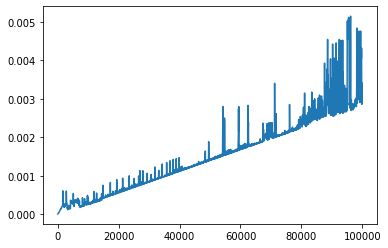

In [20]:
run_and_plot(foo, lambda n: n, 1, 100000, 50)

Этот график немного "флуктуирует", однако с лёгкостью можно увидеть, что он работает за **линейное время**

In [21]:
def foo2(n):
    result = 1
    for i in range(n):
        result = result * 3
    return result

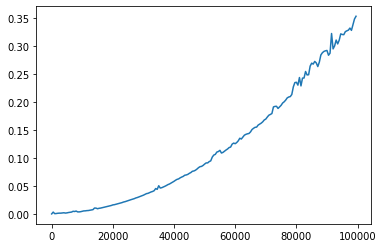

In [22]:
run_and_plot(foo2, lambda n: n, 1, 100000, 500)

Казалось бы, этот алгоритм тоже должен работать за линию. Но это не так. График времени работы выглядит совсем не линейным. Проблема в том, что числа, которые алгоритм умножает на 3 сильно растут, и умножать их становится всё сложнее и сложнее. Мы обычно будем предполагать, что арифметические операции выполняются за постоянное время, но надо понимать, что это предположение реалистично, если вы не ожидаете огромных чисел в своём алгоритме.

А давайте сравним сортировки!

In [26]:
# Пузырёк - O(n^2)
def buble_sorting (array):
    n = len(array)
    opt = 1
    while opt < n:
        for i in range(n-opt):
            if array[i] > array[i+1]:
                array[i], array[i+1] = array[i+1], array[i]
        opt+=1
    return(array)

 
#QuickSort - O(nlogn)
from random import randint

def myquicks(nums):
    def divide(left, right):
        pivot_index = randint(left, right)
        pivot = nums[pivot_index]
        nums[right], nums[pivot_index] = nums[pivot_index], nums[right]
        leftmark = left
        rightmark = right - 1
        
        while True:
            while leftmark <= rightmark and nums[leftmark] <= pivot:
                leftmark += 1
            while rightmark >= leftmark and nums[rightmark] > pivot:
                rightmark -= 1
            if leftmark > rightmark:
                break
            else:
                nums[leftmark], nums[rightmark] = nums[rightmark], nums[leftmark]
                
        nums[leftmark], nums[right] = nums[right], nums[leftmark]
        while rightmark >= 0 and nums[rightmark] == pivot:
            rightmark -= 1
        return rightmark, leftmark        

    def quicksort(left, right):
        if left < right:
            leftmark, rightmark = divide(left, right)
            quicksort(left, leftmark)
            quicksort(rightmark + 1, right)
    
    left = 0
    right = len(nums) - 1
    quicksort(left,right)
    return nums
#Немного быдлокод, но я эту сортировку писал ещё в ~9 классе, поэтому можно простить

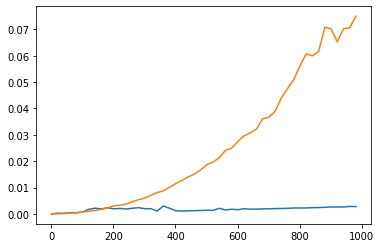

In [27]:
N = 1000
run_and_plot(myquicks, lambda n: [randint(-n, n) for _ in range(n)], 1, N, 20)
run_and_plot(buble_sorting, lambda n: [randint(-n, n) for _ in range(n)], 1, N, 20)

Разница в скорости работы алгоритмов поражает сознание. 

А давайте я ударю по самооценке и сравню свою быструю сортировку со встроенной питоновской?


Казалось бы, какая универсальная сортировка может быть быстрее квиксорта?

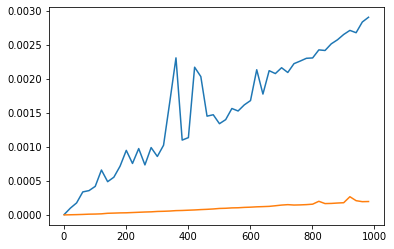

In [30]:
N = 1000
run_and_plot(mysort, lambda n: [randint(-n, n) for _ in range(n)], 1, N, 20)
run_and_plot(sorted, lambda n: [randint(-n, n) for _ in range(n)], 1, N, 20)

Шок. Такие дела. Потому что сортировки встроенные в ЯП очень умные и используют довольно нетривиальные алгоритмы. Но об этом как-нибудь в другой раз...
Но вот ссылка, кому любопытно - https://habr.com/ru/post/335920/

Теперь вы должны быть достаточно подготовленной аудиторией, чтобы понять этот мем
![meme](https://sun9-60.userapi.com/c858328/v858328991/98c61/GPCRS3MQOGg.jpg)

Давайте ещё примеры:

**Числа Фиббоначи.**
Есть два способа их вычислять:

1) Рекурсивно - это работает за $O(2^N)$

2) С помощью [динамического программирования](https://en.wikipedia.org/wiki/Dynamic_programming) - $O(N)$

3) *С помощью формулы рекуррентных соотношений - ~$O(1)$

In [31]:
# Recurrent
def fib_rec (n):
    if n == 0:
        return 0
    elif n == 1:
        return 1
    else:
        return fib_rec(n-1) + fib_rec(n-2)

#DP
def fib_dp(n):
    n +=1
    dp =[0] * (n + 1)
    dp[0] = 1
    dp[1] = 0
    for i in range(2, n+1):
        dp[i] = dp[i-1] + dp[i-2]
    return dp[n]

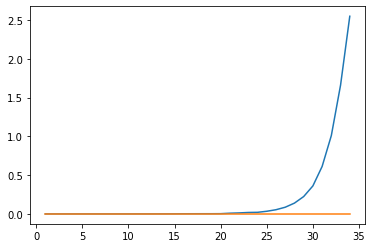

In [34]:
N = 35
run_and_plot(fib_rec, lambda n : n, 1, N, 1)
run_and_plot(fib_dp, lambda n : n, 1, N, 1)

Подсчёт даже 35-ого числа Фибоначчи занимает 2,5 секунды! Сколько же времени уйдет, чтобы подсчитать, например, 1000-ое? 

*Спойлер* - тепловая смерть вселенной случится раньше 

In [40]:
#Примерно такое количество операций потребуется 
#на вычисление тысячного числа фибоначчи:
2**1000

10715086071862673209484250490600018105614048117055336074437503883703510511249361224931983788156958581275946729175531468251871452856923140435984577574698574803934567774824230985421074605062371141877954182153046474983581941267398767559165543946077062914571196477686542167660429831652624386837205668069376

Пусть у нас [ОЧЕНЬ мощный квантовый-супер-компьютер](https://en.wikipedia.org/wiki/Clock_rate) (Хотя на самом деле, когда нужно посчитать что-то ОЧЕНЬ большое, то это делают на видеокартах. Например майнят и обучают нейросети именно на них)вот какое количество **тысячелетий** займёт вычисление 1000-ого числа Фибоначчи рекурсивным алгоритмом:

In [49]:
2**1000/10**10/60/60/24/365/1000

3.397731504268986e+280

'e+280' - это количество нулей, если что :) 

А вот с помощью дп мы это можем сделать мгновенно:

In [45]:
fib_dp(1000)

43466557686937456435688527675040625802564660517371780402481729089536555417949051890403879840079255169295922593080322634775209689623239873322471161642996440906533187938298969649928516003704476137795166849228875

Ну в общем теперь все понимают, зачем нам асимптотика :)

Ну вот теперь точно последний пример - **Бинпоиск**

Задача: найти индекс элемента отсортированном массиве.

1) Это можно сделать очевидным циклом - $O(N)$

2) Бинпоиском - $O(\log N)$

In [105]:
def linear_search(a, x, n):
    i = 0
    while i < n and a[i] != x:
        i += 1   
    return i
    
def bin_search(a, x, n):
    left = -1
    right = n
    while right - left > 1:
        middle = (right + left) // 2
        if a[middle] >= x:
            right = middle
        else:
            left = middle
    return right    

In [114]:
#Перепишем немного функцию для замера скорости. 
#Теперь функция может принмать сразу несколько алгоритмов,
#которые тестируются на одних и тех же тестах
def run_and_plot_2(functions, generate_test, start, end, step):
    timings = [[] for _ in range(len(functions))]
    for i in range(start, end, step):
        args = generate_test(i)
        for j in range(len(functions)):
            startt = time()
            functions[j](*args)
            endt = time()
            timings[j].append(endt - startt)
    for j in range(len(functions)):
        plt.plot([i for i in range(start, end, step)], timings[j])

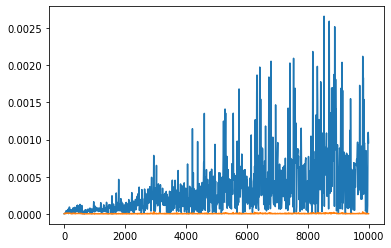

In [117]:
def generate_test_search(n):
    a = [randint(-n*100, n*100) for _ in range(n)]
    a.sort()
    x = a[randint(0, n-1)]
    return a, x, n

run_and_plot_2([linear_search, bin_search], generate_test_search, 1, 10000, 10)

Тут тяжело разглядеть разницу, так как очевидно, что первый алгоритм работает за $O(N)$ лишь в худшем случае - только когда искомый элемент стоит последнем. Тогда как бинпоиск **всегда** работает за $O(\log N)$. Поэтому на графике мы видим гладкую оранжевую прямую и очень нестабильную линию. 

Здесь мы видим ситуацию, когда асимптотическая работа одного алгоритма постоянна, а у другого встречается редко.

Например, у нас на выбор есть два алгоритма:

1) Работает за $O(N^2)$ в худшем случае, но в среднем работает за $O(N)$.

2) Всегда работает за $O(N \log N)$

(Можете посмотреть на график снизу, чтобы осознать разницу)

![graph](https://upload.wikimedia.org/wikipedia/commons/thumb/7/7e/Comparison_computational_complexity.svg/1024px-Comparison_computational_complexity.svg.png)

Как же нам быть в такой ситуации? И как правильно различать такие случаи?

Для это существуют разные О-нотации:

**В О-нотации есть несколько разных обозначений:**
# $$\mathcal{0}, o, \Omega, \omega, \Theta$$

$f(n) = \mathcal{0}(g(n))$ means $c * g(n)$ is an upper bound on $f(n)$. Thus there exists some constant c such that $f(n)$ is always $<= c * g(n)$, for large enough $n$ (i.e., $n >= n0$  for some constant $n0$).

$f(n) = \Omega(g(n))$  means $c * g(n)$ is a lower bound on $f(n)$. Thus there exists some constant c such that $f(n)$ is always $>= c * g(n)$, for all $n >= n0$.

$f(n) = \Theta(g(n))$ means $c1 * g(n)$ is an upper bound on $f(n)$ and $c2 * g(n)$ is a lower bound on $f(n)$, for all $n >= n0$. Thus there exist constants $c1$ and $c2$ such that $f(n) <= c1 * g(n)$ and $f(n) >= c2 * g(n)$. This means that $g(n)$ provides a nice, tight bound on $f(n)$.

$\Theta$ **denotes an asymptotically tight upper and lower bound.**

$\mathcal{0}$ **denotes an upper bound, but this bound might or might not be tight.**

$o$ **denotes an upper bound that is not tight.**

$\Omega$ **denotes a lower bound, but this bound might or might not be tight.**

$\omega$ **denotes a lower bound that is not tight.**

Мне лень всё это рассписывать и техать, поэтому вот вам ссылка https://en.wikipedia.org/wiki/Big_O_notation, там всё подробно написанно.
Настоятельно рекомендую это всё изучить. Уметь различать эти нотации очень важно.

## 3 Скорость процессора

Как посчитать количество операций мы теперь знаем. А как оценить время? Сколько операций компьютер успевает совершать, например, за 1 секунду?

Вообще, ответ на этот вопрос зависит от многих факторов:

1) Производительность компьютера

2) Язык программирования

3) *Вычисления ещё можно и распараллеливать, и считать сразу несколько операций одновременно. 

4) и т.д.

Но нам всё-таки нужна хоть какая-то оценка. 

Здесь я не буду вдаваться в мир железа
Каждый процессор имеет такую характеристику, как GHz (ГГц) - это частота. А частота - это обратное к времени.

**Это значит, что зная количество ГГц, мы можем измерить количество операций, которое процессор (CPU) может произвести за одну секунду.**


Например, представьте, что процессор имеет скорость в 1.8GHz тогда это значит, что он может произвести 1,800,000,000 операций за одну секунду.

Однако стоит понимать, что это не значит, что он может произвести в точности $18*10^8$ операций. Разные операции занимают разное количество времени, поэтому это значение так же зависит от большого количества факторов

In [7]:
from time import time
start = time()
count = 0
while time() - start < 1:
    count += 1
print('{} операций успел совершить компьютер за ~1 секунду'.format(count))

5336637 операций успел совершить компьютер за ~1 секунду


Что это такое? Почему так мало? Но нужно учитывать, что здесь совершенно значительно больше операций, ведь мы ещё и считаем время. 

На самом деле это был не очень профессиональный метод измерения скорости. Вот тут уже более качественный опыт:

In [12]:
%time a = [1 for i in range(count)]

CPU times: user 205 ms, sys: 16 ms, total: 221 ms
Wall time: 222 ms


Здесь мы совершили такое же количество операций в 5 раз быстрее.

Вот, например, очень полезная табличка по времени выполнения различных операции на C++

![cpuinfo](http://ithare.com/wp-content/uploads/part101_infographics_v07.png)

In [13]:
#Вот ещё приколюха. 
import numpy as np # классический import

%timeit np.arange(10000)**2

%timeit [i**2 for i in range(10000)]

18.8 µs ± 1.42 µs per loop (mean ± std. dev. of 7 runs, 100000 loops each)
3.15 ms ± 52.6 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


Та же самая задача - возвести 10000 последовательных натуральных чисел в квадрат, посчиталась в нампаевском массиве значительно быстрее. Почему? Потому что нампаевский массив очень сильно отличается от питоновского списка. Более того, он написан на плюсах. Да-да. Когда вы импортируете numpy, вы ещё вместе с ним импортируете плюсовский компилятор. Поэтому, когда над нампаевскими массивами совершаются операции, то он буквально относит значения в C++, там всё считает, а после возвращает вам результат. Такие дела. 

### Источники и полезная информация:
    
1) https://wiki.algocode.ru/index.php?title=O-нотация_light_version

2) https://en.wikipedia.org/wiki/Hertz

3) http://ithare.com/infographics-operation-costs-in-cpu-clock-cycles/

4) https://en.wikipedia.org/wiki/Big_O_notation

5) http://wiki.cs.hse.ru/Алгоритмы_и_структуры_данных_1_основной_поток_2019/202

6) https://stackoverflow.com/questions/1960424/what-is-the-difference-between-o-Ω-and-Θ

7) https://stackoverflow.com/questions/1364444/difference-between-big-o-and-little-o-notation